In [35]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

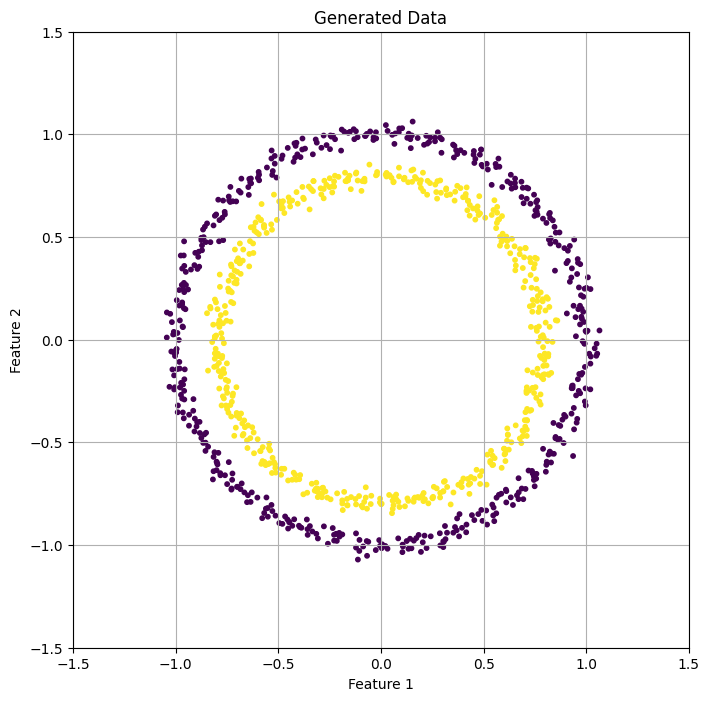

In [36]:
nSamples = 1000

X, y = make_circles(n_samples=nSamples, noise=0.03)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='viridis')
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [37]:
circles = pd.DataFrame(X, columns=['X1', 'X2'])
circles['Label'] = y
circles

,X1,X2,Label
0,-0.560109,-0.822758,0
1,-0.486080,-0.657713,1
2,0.417596,0.741806,1
3,-0.159441,0.776232,1
4,0.254140,-0.765132,1
...,...,...,...
995,-0.734588,0.238795,1
996,0.825137,0.468265,0
997,0.690798,-0.469829,1
998,-0.728115,-0.730042,0


In [38]:
X.shape, y.shape

((1000, 2), (1000,))

In [39]:
import torch
torch.__version__

'2.4.0+rocm6.3.2'

In [40]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [43]:
X[:5], y[:5] 

(tensor([[-0.5601, -0.8228],
         [-0.4861, -0.6577],
         [ 0.4176,  0.7418],
         [-0.1594,  0.7762],
         [ 0.2541, -0.7651]]),
 tensor([0., 1., 1., 1., 1.]))

In [46]:
X.dtype, y.dtype, type(X)

(torch.float32, torch.float32, torch.Tensor)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [48]:
from torch import nn

In [49]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 1)
    
    def forward(self, x):
        return self.layer2(self.layer1(x))

In [51]:
model = CircleModel()
model

CircleModel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
untrainedPreds = model(X_test)